<a href="https://colab.research.google.com/github/Mustafasohail7/CUDA_Spring_2024/blob/main/Assignment3/AY06993_MS06860_Assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 432 GPU Accelerated Programming
## Assignment 3
### Ali Asghar Yousuf | Mustafa Sohail
### ay06993@st.habib.edu.pk | ms06860@st.habib.edu.pk

### Initialization

#### Downloading the source code for this assignment:
Next, we download the required source files from the github repository of Assignment 3.

In [1]:
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/cpu-smallpt.cpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/geometry.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/imageio.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/math.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/rng.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/sampling.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/specular.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/sphere.hpp"
!wget -P src/cpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/vector.hpp"

--2024-04-06 12:20:19--  https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/cpu/cpu-smallpt.cpp
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/cpu/cpu-smallpt.cpp [following]
--2024-04-06 12:20:19--  https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/cpu/cpu-smallpt.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6570 (6.4K) [text/plain]
Saving to: ‘src/cpu/cpu-smallpt.cpp’

cpu-smallpt.cpp     100%[===================>]   6.42K  --.-KB/s    in 0s      

2024-04-06 12:20:19 (70.6 MB/s

In [19]:
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/gpu-smallpt.cu"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/cuda_tools.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/geometry.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/imageio.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/math.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/sampling.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/specular.cuh"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/sphere.hpp"
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/vector.hpp"

File ‘src/gpu/gpu-smallpt.cu’ already there; not retrieving.

File ‘src/gpu/cuda_tools.hpp’ already there; not retrieving.

File ‘src/gpu/geometry.cuh’ already there; not retrieving.

File ‘src/gpu/imageio.hpp’ already there; not retrieving.

File ‘src/gpu/math.hpp’ already there; not retrieving.

File ‘src/gpu/sampling.cuh’ already there; not retrieving.

File ‘src/gpu/specular.cuh’ already there; not retrieving.

File ‘src/gpu/sphere.hpp’ already there; not retrieving.

File ‘src/gpu/vector.hpp’ already there; not retrieving.



In [67]:
!wget -P src/gpu/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/gpu-smallpt.cu"

--2024-04-06 13:15:10--  https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment3/gpu/gpu-smallpt.cu
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/gpu/gpu-smallpt.cu [following]
--2024-04-06 13:15:11--  https://raw.githubusercontent.com/aliasgharchakera/CUDA_Spring_2024/main/Assignment3/gpu/gpu-smallpt.cu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8629 (8.4K) [text/plain]
Saving to: ‘src/gpu/gpu-smallpt.cu’

gpu-smallpt.cu      100%[===================>]   8.43K  --.-KB/s    in 0s      

2024-04-06 13:15:11 (80.6 MB/s) - 

In [3]:
from PIL import Image
import IPython

def convert(device=True):
    if device:
        file_name = "gpu-image"
    else:
        file_name = "cpu-image"
    with open(f"{file_name}.ppm", "r") as file:
        # Read header P3
        header = file.readline()
        # Read width and height
        width, height = map(int, file.readline().split())
        # Create new png
        img = Image.new("RGB", (width, height))
        # Read max color value
        max_color = int(file.readline())
        # Read all lines
        lines = " ".join([line.strip() for line in file.readlines()])
        lines = lines.split(" ")
        pixels = []
        for i in range(0, len(lines), 3):
            pixels.append((int(lines[i]), int(lines[i+1]), int(lines[i+2])))
        img.putdata(pixels)
        img.save(f"{file_name}.png")


### CPU Implementation

#### Compiling and running smallpt on CPU:
We compile the smallpt code and run the executable to generate the image.

In [20]:
!g++ /content/src/cpu/cpu-smallpt.cpp -o cpu-smallpt
!./cpu-smallpt 8

Number of samples: 2
Rendering (4 spp)  4.82%^C


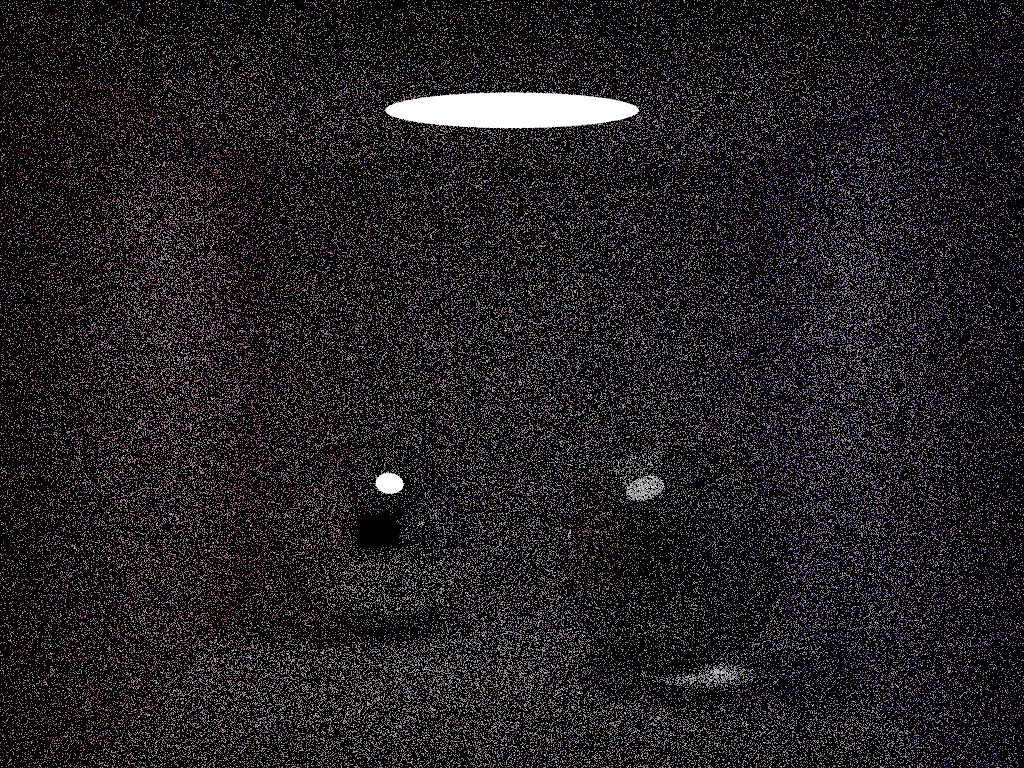

In [11]:
# Convert the image to png and display
convert(device=False)
IPython.display.Image('cpu-image.png')

### GPU Implementation

#### Compiling and running smallpt on GPU:
We compile the smallpt code and run the executable to generate the image.
Two optional parameters can be supplied during the runtime.
1.   The first parameter specifies the number of samples per pixel
2.   The second parameter is a '--all' flag which if enabled specifies whether all sampling rates below the stated one need to be considered for timing purposes.


In [98]:
!nvcc src/gpu/gpu-smallpt.cu -o gpu-smallpt
!./gpu-smallpt 32 --all

Number of samples: 8


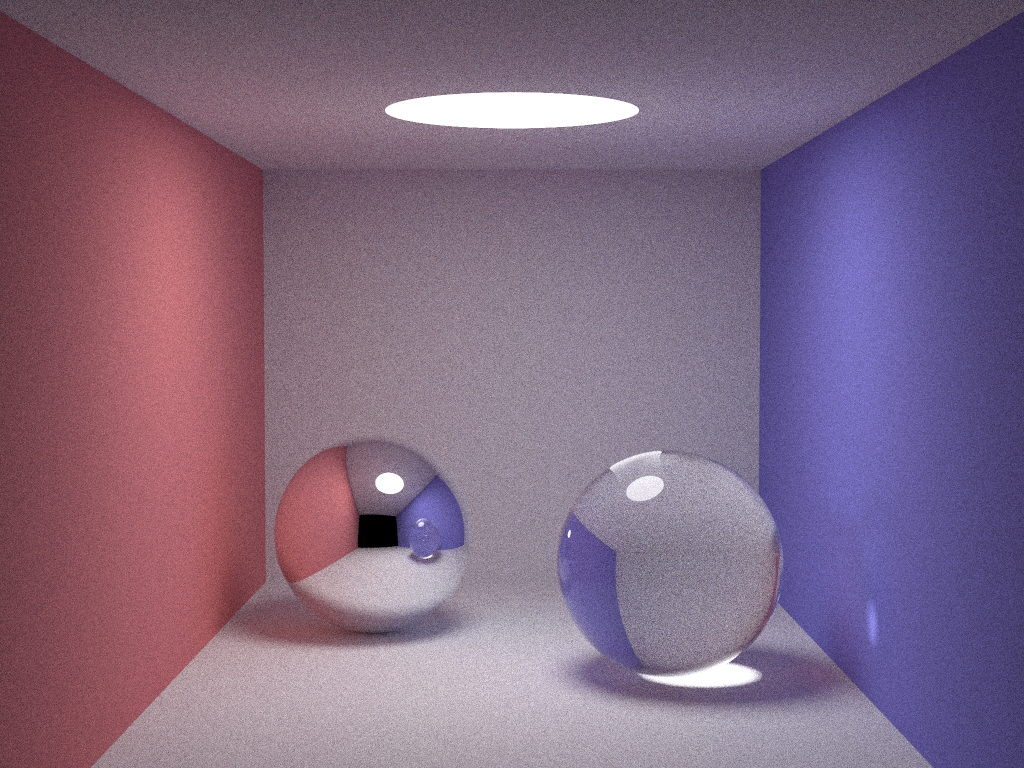

In [96]:
# Convert the image to png and display
convert(device=True)
IPython.display.Image('gpu-image.png')

### Results

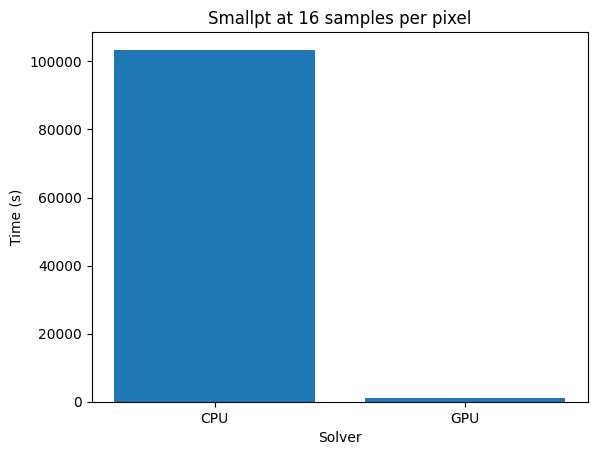

In [99]:
import matplotlib.pyplot as plt

x = ["CPU", "GPU"]

# Read the data from the file and average the time
cpu_time = dict()
gpu_time = dict()

with open("cpu_timing.txt", "r") as f:
    for i in f.readlines():
        parts = i.strip().split(', ')
        sample = int(parts[0].split(': ')[1])
        time = int(parts[1].split(': ')[1].split(' ')[0])
        if sample in cpu_time:
          cpu_time[sample].append(time)
        else:
          cpu_time[sample] = [time]

with open("gpu_timing.txt", "r") as f:
    for i in f.readlines():
        parts = i.strip().split(', ')
        sample = int(parts[0].split(': ')[1])
        time = int(parts[1].split(': ')[1].split(' ')[0])
        if sample in gpu_time:
          gpu_time[sample].append(time)
        else:
          gpu_time[sample] = [time]

    for i in gpu_time:
      if len(gpu_time[i])>3:
        gpu_time[i] = gpu_time[i][1:]

samples = min(max(cpu_time.keys()),max(gpu_time.keys()))
if samples not in cpu_time or samples not in gpu_time:
  samples = 1

y = [sum(cpu_time[samples])/len(cpu_time[samples]), sum(gpu_time[samples])/len(gpu_time[samples])]
plt.bar(x, y)
title = "Smallpt at {} samples per pixel".format(samples*4)
plt.title(title)
plt.xlabel("Solver")
plt.ylabel("Time (s)")
plt.show()

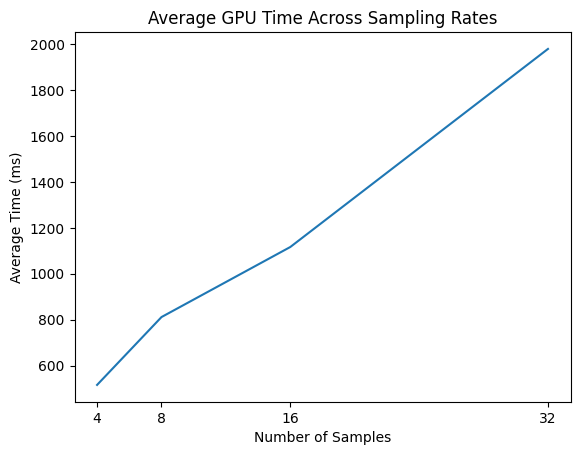

In [102]:
# Compute average GPU times
gpu_avg_times = {samples: sum(times) / len(times) for samples, times in gpu_time.items()}

a = list(gpu_time.keys())
b = [i*4 for i in a]


# Plotting
plt.plot(b, list(gpu_avg_times.values()), label='GPU')


plt.xticks(b)

# Add labels and legend
plt.xlabel('Number of Samples')
plt.ylabel('Average Time (ms)')
plt.title('Average GPU Time Across Sampling Rates')

# Show plot
plt.show()

We can see a huge amount of time difference between CPU and GPU pathtracer as expected. Significant speedup is achieved by running the pathtracer on GPU since we can now shoot multiple rays in parallel instead of sequentially waiting for them. The more we increase the number of samples per pixel, the more efficient the GPU code becomes. The CUDA pathtracer timing also increases as we increase the number of pixels which can be seen in the line graph.

### Improvements

We can improve our code by leveraging the different memory levels of the GPU. We can use shared memory to store the scene geometry or material information or any kind of cached scene data that is being used across threads/rays. This will reduce the overhead of copying the data to the GPU and back to the CPU. We can also speed up the processing by using more efficient kernel configurations.